In [19]:
# %%time

## 현재 사용되는 자료의 인코딩 문제로 한글표현이 잘 안됨.(패킷이 정확한 길이로 나뉘어야되서 특수한 인코딩을 사용하는듯 보임)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

s=[]

data_path = "D:/FinanceData_raw/raw_data_set/sise2local.ALL_CMDT.0206"

with open(data_path, "rt", encoding='iso-8859-1') as f:
    for i in range(1000):
        t = f.readline()[17:]
        print(i, "번째 정보 : ", t[0:5],t[408:411],t[454:457])
        if t[0:5]=='A0016' and t[408:411]=='BM3' and t[454:457]=='001':
            product_ID = t[18:30]
            print('product_ID = ',product_ID)
            break
    s = f.readlines()
    
#1.조건에 충족하는 틱정보만 골라내기

#2.index별로 자료분리
#순서 : 체결시각, 현재가격, 체결수량, 매도1호가, 매수1호가, 최종매도매수, 총잔량매도, 총잔량매수

#위의 2단계를 한방에 정리해서 시간단축
ls3 = [[row[:17],int(row[40:48]),int(row[48:54]),row[243:251],row[161:169],row[152:153],row[235:242],row[153:160]]for row in s if (product_ID == row[22:34]) and (row[17:22] == 'A3016' or row[17:22] == 'G7016' )]
result = pd.DataFrame(ls3,columns=["체결시각","현재가격","체결수량","매도1호가","매수1호가","최종매도매수","총잔량매도","총잔량매수"])

result.to_csv("project1_"+str(product_ID)+"_"+str(t[10:18])+"_KMW.csv", index=False)

0 번째 정보 :  A0016 BM3 001
product_ID =  KR4165N30007


In [20]:
#체결수량 50이상만 보기
# result[result['매도1호가']!=''].reset_index()

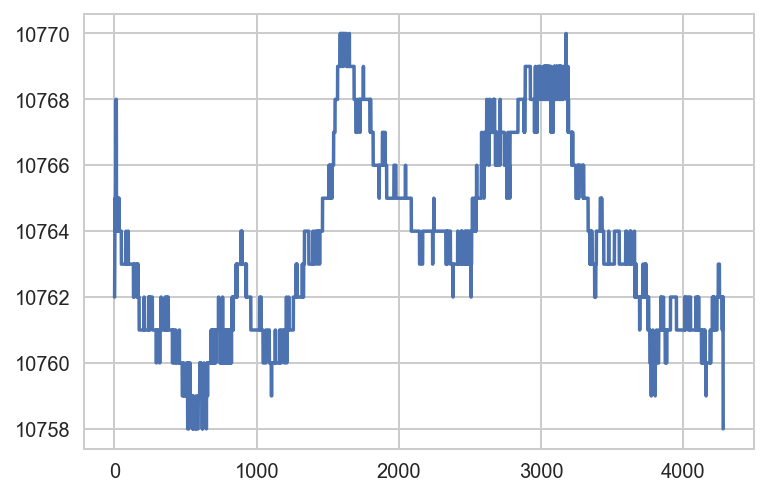

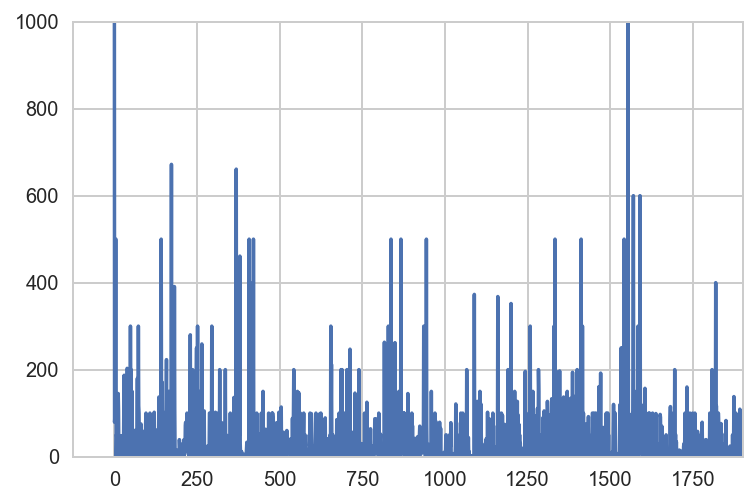

NameError: name 'result2' is not defined

In [21]:
%matplotlib inline
#주피터노트북에서 라인 아래에 보여지도록 설정

%config InlineBackend.figure_formats = {'png','retina'} 
#png 이미지 압축기술설정, retina 그래프 해상도 2배 높히기

plt.plot(result['현재가격'])
plt.show()
x = np.arange(2000)
# result2 = pd.DataFrame([result['체결수량']])
# df = pd.concat([result2[0],result2['체결수량']])


plt.plot(result['체결수량'])
plt.xlim(-125, 1900)
plt.ylim(0,1000)
plt.show()

result2


In [14]:
# 코드길이재기, 코드 자르기 연습
a = '[09:03:01-204059]G7016KR4175N20007079G1 0010810000000140090301190000000000000000 00108150 00108230 00108100 0010811000054080000584893110000000000000000010003141 00108100000529 00108090000107 00108080000185 00108070000059 001080600001470002292 '
print(len(a))
b = '[09:03:01-204059]G7016KR4175N20007079G1 0010810000000140090301190000000000000000 00108150 00108230 00108100 0010811000054080000584893110000000000000000010003141 00108100000529 00108090000107 00108080000185 00108070000059 001080600001470002292 00108110000071 00108120000286 00108130000276 00108140000070 0010815000024300267002300140012000800110026100080018001600110019 00109180 00107020'
b[161:169]

243


'00108100'

#### 코드예제
[09:03:01-204059]G7016KR4175N20007079G1 0010810000000140090301190000000000000000 00108150 00108230 00108100 0010811000054080000584893110000000000000000010003141 00108100000529 00108090000107 00108080000185 00108070000059 001080600001470002292 00108110000071 00108120000286 00108130000276 00108140000070 0010815000024300267002300140012000800110026100080018001600110019 00109180 00107020